# Using CellPipeline
## A cell type specific analysis and visualization tool for the gene of interest

In [1]:
import sys
sys.path.append('/lustre/groups/ml01/workspace/samantha.bening/Bachelor/')
from importlib import reload
import genereporter.cell_pipeline as cp
#from genereporter.cell_pipeline import CellPipeline
reload(cp)

cp = cp.CellPipeline("/lustre/groups/ml01/workspace/samantha.bening/Bachelor/", "data2/veo_ibd_balanced.h5ad")

adata = cp.get_adata()
adata

AnnData object with n_obs × n_vars = 176789 × 28162
    obs: 'sampID', 'LMUSampID', 'PatientID', 'AnatomicLocation', 'PoolID', 'Protocol', 'CellsLoaded', 'FreezeProtocol', 'AnatomicLocation_Relation', 'AgeYM', 'Sex', 'Inflammation', 'Viability', 'SampleDate', 'sample_LMU_info_Timepoint', 'Ischemia_time', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'ribo_frac', 'hb_frac', 'celltype_l3', 'celltype_l1', 'celltype_l2', 'PatientID_genotype'
    uns: 'PatientID_colors', 'PatientID_genotype_colors', 'celltype_l1_colors', 'celltype_l2_colors', 'celltype_l3_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'unintegrated_X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [2]:
# print cell type names here; easier to select
print(f"Coarse cell types: ")
for cell_type in adata.obs['celltype_l2'].unique():
    print(f"\t{str(cell_type)}")

Coarse cell types: 
	Pericyte
	B
	Endothelial
	CD4 T
	CD8 T
	Fibroblast
	Cycling B
	Cycling Myeloid
	Cycling Stroma
	Cycling T
	Epithelial
	Glial
	Myeloid
	NK_ILC
	Plasma
	Tuft
	Smooth Muscle Cell
	pDC
	Mast
	nan


In [3]:
# set your gene of interest
GOI = "CASP8"

# set your cell type of interest
# This can be changed later as well
cell_type = 'CD4 T'

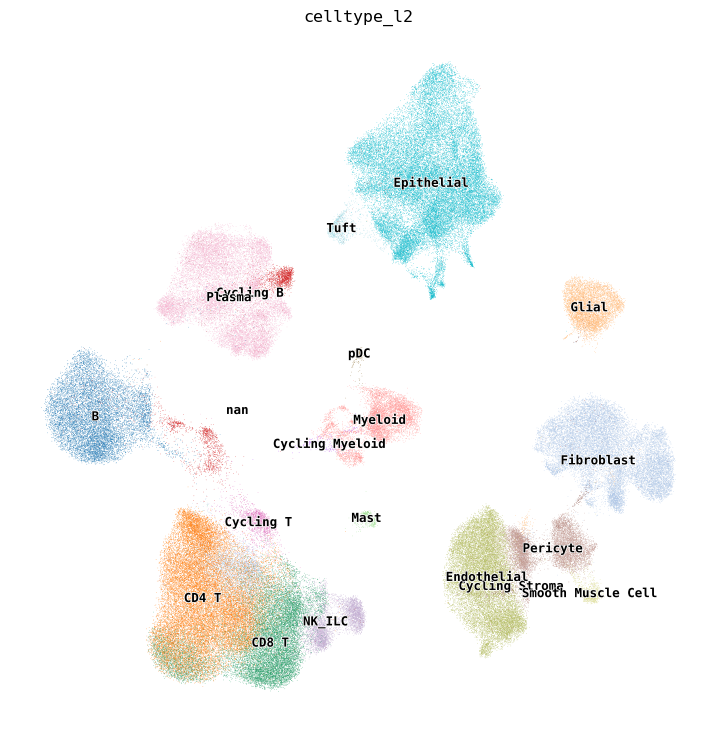

In [5]:
# UMAP of coarse cell types
cp.plot_umap(color="celltype_l2")

In [ ]:
expr_sum = cp.explain_expr_celltypes(GOI)
expr_sum
# this is very slow and not really working atm

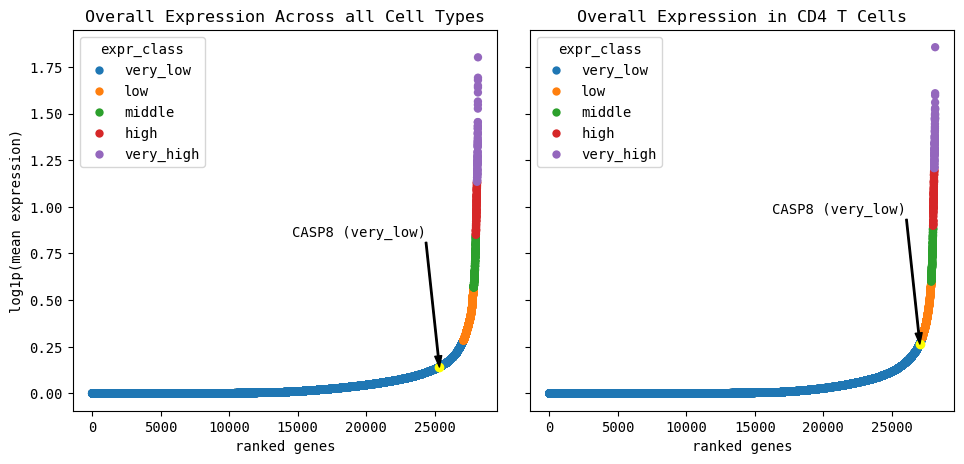

Summary for all cells: 
Quantile thresholds: 
very low: 96.2325, low: 98.8921, middle: 99.4425, high: 99.7479, very high: 99.7500

Number of genes per category: 
very_low: 27101
low: 749
middle: 155
high: 86
very_high: 71


Summary for CD4 T cells: 
Quantile thresholds: 
very low: 96.6728, low: 99.0022, middle: 99.4674, high: 99.7479, very high: 99.7500

Number of genes per category: 
very_low: 27225
low: 656
middle: 131
high: 79
very_high: 71



In [3]:
cp.plot_expressions(GOI, cell_type, show_summary=True)
# Can change show_summary=True to show the summary of the expression classes (quantile thresholds and cell counts per category)

## GOI expression across cell types

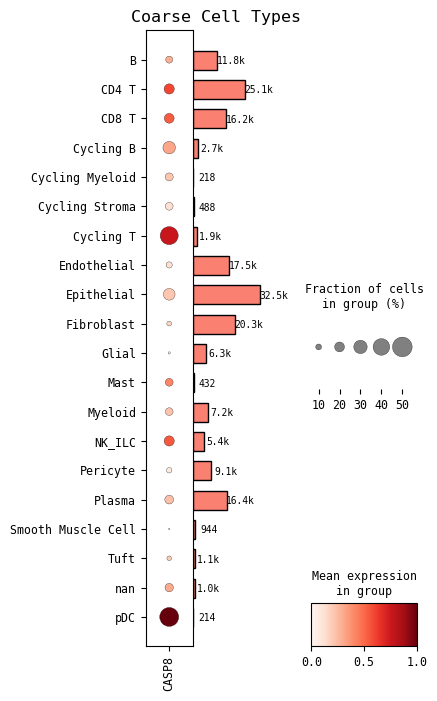

In [6]:
# find expression across cell types of GOI here
cp.dotplot(GOI)

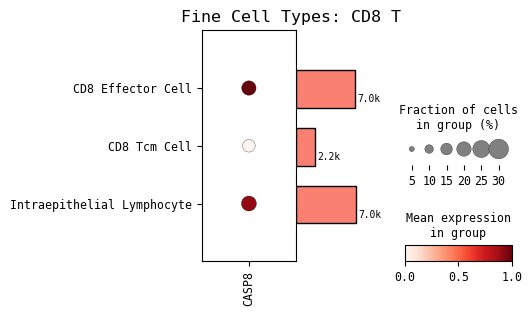

In [12]:
cp.dotplot(GOI, cell_type='CD8 T')

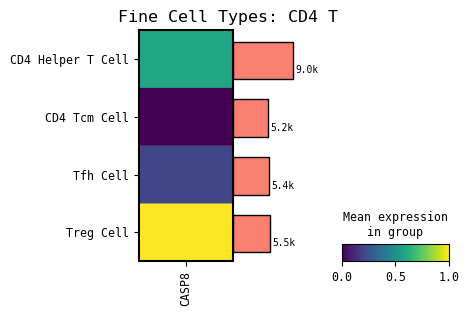

: 

In [15]:
cp.matrixplot(GOI, cell_type='CD4 T')

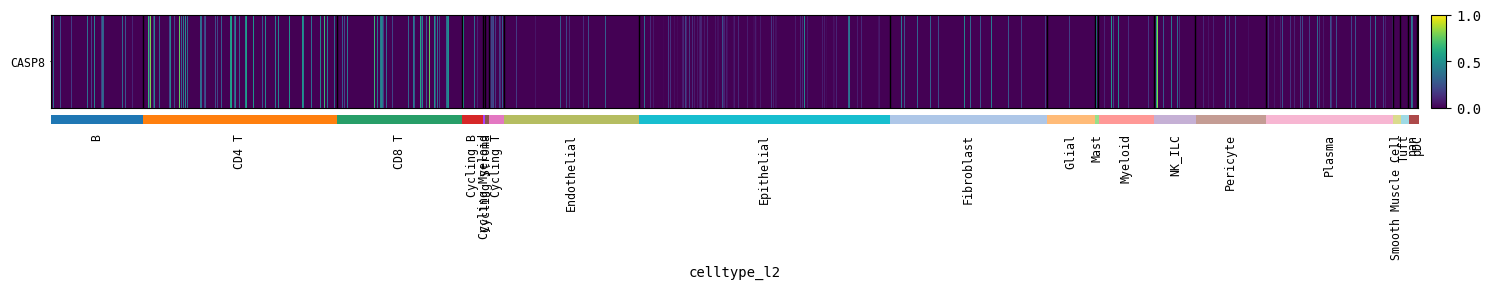

In [5]:
cp.heatmap(GOI)

## Expression vs. Detection visualization
<body>
<br>
This can contextualize the expression levels we observed previously. In single-cell RNA-seq, only a random sampling of the RNA present in a cell is selected to be sequenced. By pure chance, lowly expressed genes may not be present in all the sampled RNA due to their low prevalance. Here, we can inspect the maximum percentage of expression expected in all genes, specifically our gene of interest. 
</body>

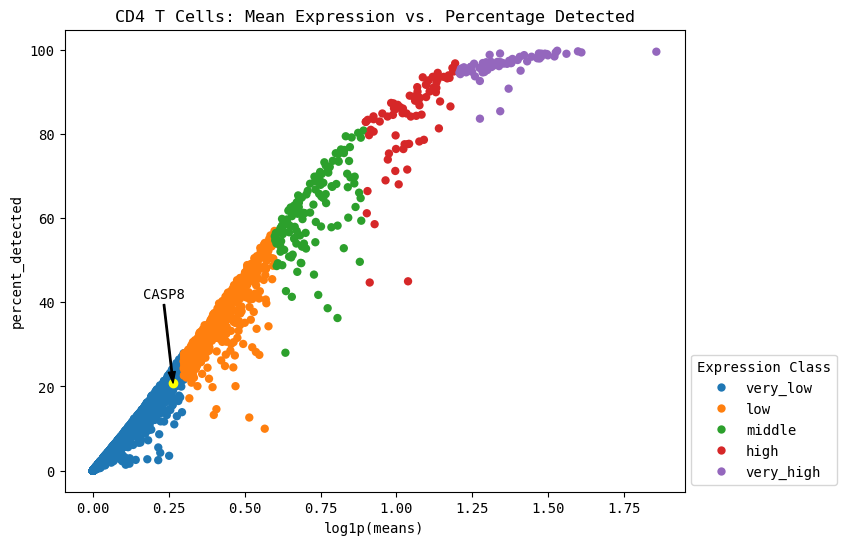

In [6]:
cp.expression_vs_detection(GOI, cell_type='CD4 T')
# Can add "cell_type=cell_type" to plot only the cell type of interest
# todo this section before dotplots etc. 

### Automatically identify lower outliers (clue to look at celltype subset)

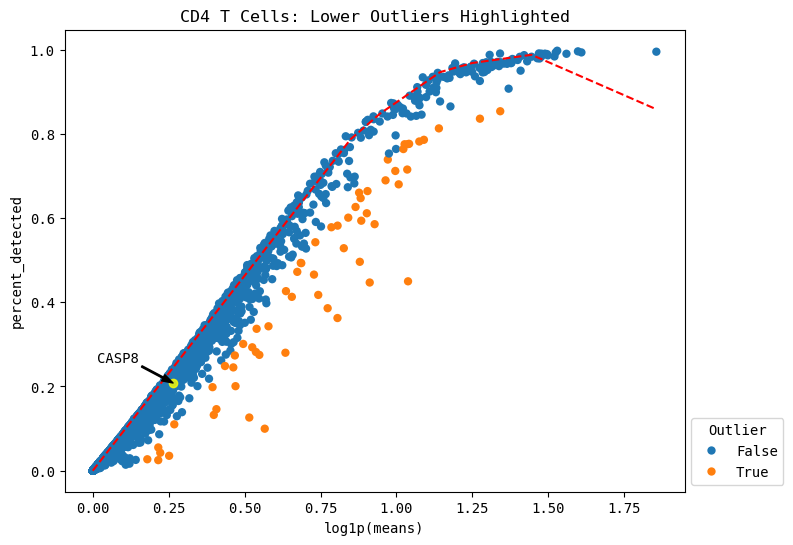

In [6]:
cp.plot_outliers(GOI, cell_type=cell_type, outlier_threshold=0.1)
# Can add "cell_type=cell_type" to plot only the cell type of interest

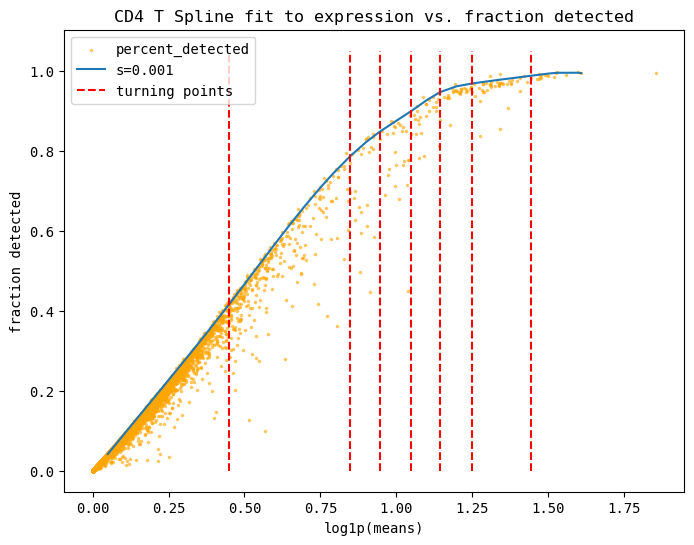

In [9]:
cp.fit_spline(cell_type = cell_type, plot=True)

In [7]:
cp.list_outliers()
# show top 5 most extreme outlier genes (by orthogonal distance to the max line)
# can show top x genes by adding "head=x" to the function

: 